<a href="https://colab.research.google.com/github/KARTIKPARATKAR/DEEP-LEARNING-WORK/blob/main/SequenceToSequenceModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sequence To Sequence**

WHen we have a sequence in input and output data like text then that data is a Sequence To Sequence data and the models which handles or work on such data is known as Seq2Seq models.

Example - Machine translation from english to german. Input is English text and Output is German Text.


Seq2Seq models or data handling is bit challanging.We have input text which can be of variable length and output could also be variable length.So dealing with variable length is the challange.

**Encoder-Decoder Architecture**

Throughout we will consider machine translation as the example.We have Encoder and Decoder blocks along with input and output at encoder and decoder with context vector which connects encoder and decoder.Input in given to encoder by one by one word.Encoder compresses the information and context vector pass this information to decoder by context vector. Decoder receives the compressed information and gives the output.

We are converting "Nice To Meet You" in Hindi which is a machine translation task.There is a LSTM cells in encoder as well as decoder blocks.

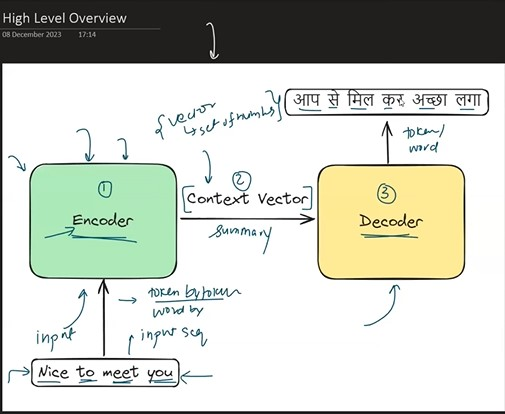

Encoder Architecture are as follows:

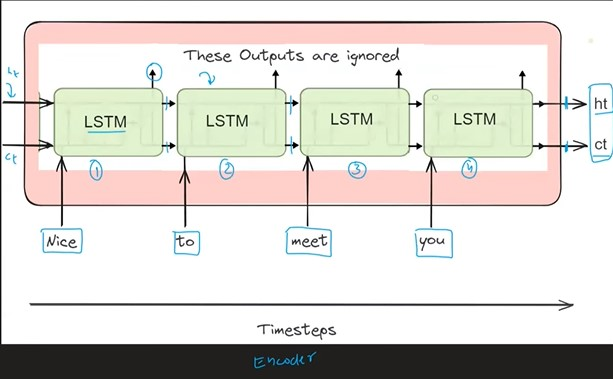

Decoder Architecture are as follows:

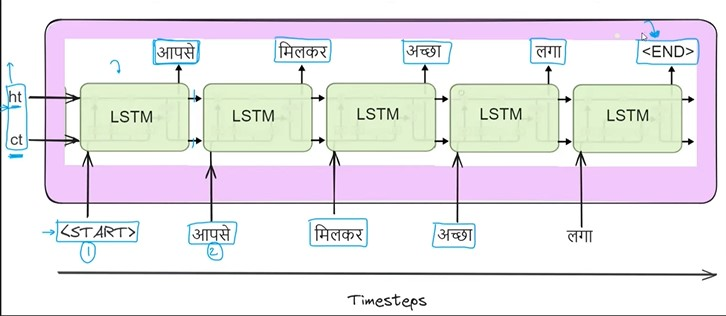

**Training of Encoder Decoder Model**

Let we have dataset having two columns as English and hindi and we have 2 rows as follows.Encoder - Decoder model cant understand the english language so we will have to convert this english statements into numbers using one hot encoding technique.

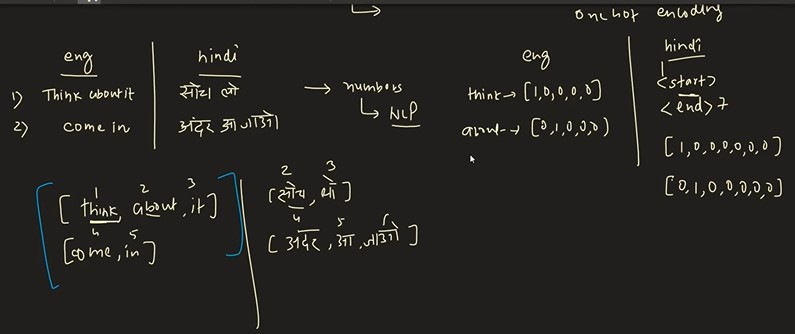

Row1 - [Think about it]

We will have LSTM in encoder as well as decoder. Both weights and biases values in LSTM will be randomly initialized.We 1st passed word "Think" , then next time step we passed "about" , then next time step we passed "it".After passing all words in row 1 through encoder block , we get the output of the LSTM present in Encoder as Ct and Ht in form of context vector which contains the compressed information.


In decoder , we are getting word "start" which tells decoder to start giving output.Ideally it should print "सोच" as 1st input word is "think" but this is a neural network which can not print the hindi word so it prints the appropriate one hot encoded vector of word "सोच".There is a softmax layer at every output time step of the decoder LSTM layer which gives the probability of each word present in output hindi column.As this is the 1st forward propogation the result of this softmax function must not be compulsorily "सोच". It can give some other word also. If there is mistake or error in output of the result of forward propogation , we can calculate the loss and according to this loss we perform backpropogation and change the weight and bias of the LSTM layer to get the perfect output.

To calculate the loss of model in forward propogation we will use categorical crossentropy loss function.We will calculate loss of the model at every time step.We got more loss value in time step where our model gave wrong output and we got less loss value in time step where our model gave kind of perfect result.

We will calculate the gradient of the loss with each of the trainable parameters.What these gradient states is which parameters contributed in loss function and where should we direct that parameter so that we get the lower loss function.On the basis of these gradient , we will update the weights. We use optimizers like ADAM EMSProp etc.Optimizers adjust the weight value in such direction where loss is low and it is done on the basis of learning rate.

So basically we did these steps:

forward propogation with initial weights --->  Ouput of For.Pro. is compared with correct output ----> we got loss and calculated the gradient w.r.t. each of trainable parameter --->  Gradients are used to update the weights using optimizers.

This is how training is done in Encoder - Decodr Architecture.


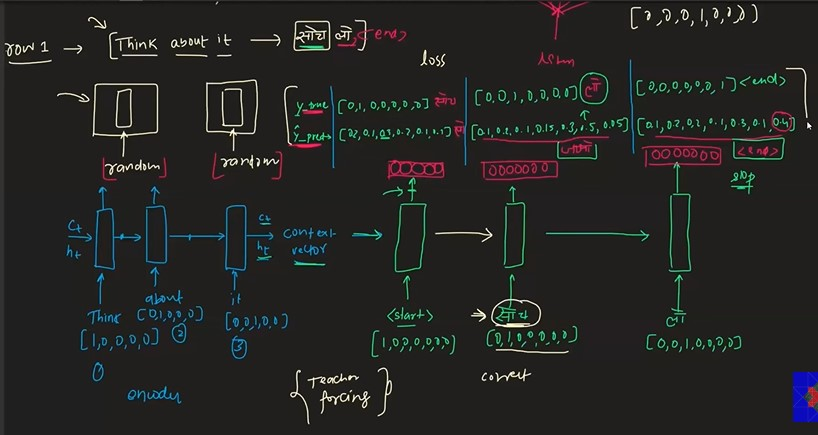

**Prediction -**

Now , we have trained the Encoder -Decoder model and we are ready with our updated/correct weight and bias value.Now we have to convert the English sentence to Hindi language.Let we have [Think About It] as the new sentence which we have to convert in Hindi with out trained model.

We will one hot encode the input sentence so that we can give it as input to the encoder block.We have 3 words in sentence so we will pass these 3 words in 3 time steps. While getting output , we dont know the true values of the output as in we dont know what is the translation of this english sentence in hindi is.

While getting ouput , We will first pass word "start" to inform model that start giving output.we have softmax layer at output of each LSTM layer. We will get the probability of each word and whichever probability is more , we will print it as the output of current time step. We got "soch","jao","lo" as output of each time step for input sentence "Think about it".


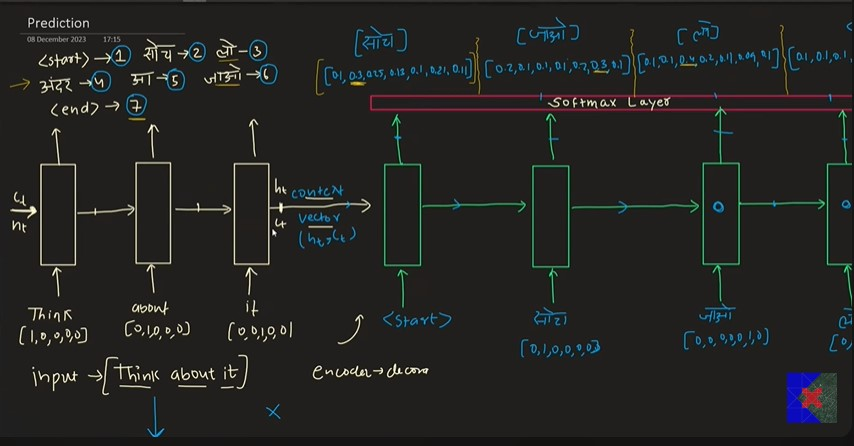



#Improvement From Basic Encoder - Decoder Architecture To Advanced Architecture-

**1)Embedding layer Advancement-**

Embedding layer in neural network is a special type of layer that maps discrete input tokens like words and characters into continuous dense vector representations.When using Embedding lYer then we dont need to perform one-hot-encoding.

We were performing the one-hot-encoding before giving the input to encoder block.But if words are more then it is not feasible to perform one-hot-encoding. Instead of it , we can use embedding layer.Embedding layers are low dimentions and they are the summary of the word.We can use pretrained embedding layer like word-to-vec or Glove or we can define a embedding layer and train it with the model training.

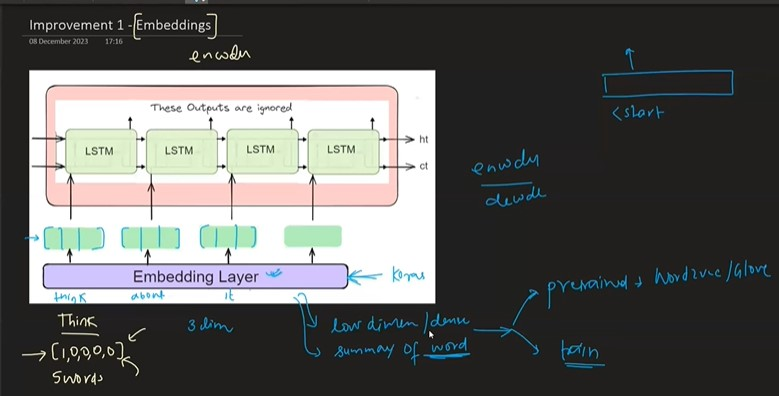

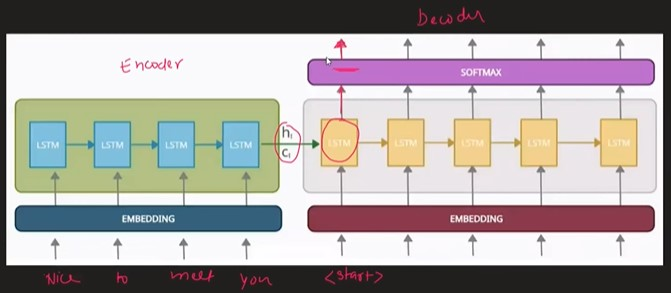





**2) Instead Single Layer LSTM , Use Deep LSTM -**

Generally we use single layer LSTM architecture in Encoder and Decoder block. INstead of it , we can define the deep/stacked LSTM model architecture along with the embedding layer in input encoder and input decoder block.We have 3 layers of LSTM in encoder which is creating 3 contxt vector and passing the compressed information to decoder LSTM layer.

Why to use Deep LSTM -

1)It helps in remembering the long term dependencies.We have multiple context vector which passes the compressed infomation to decoder block when we use Deep LSTM.

2)Deep lSTM architecture can understand the hierarchical data which means lower level LSTM layer understands words , mid level LSTM layer understands Sentences and High level LSTM layer understands paragraphs.

3)Whenever we increase the deep learning neural network parameters , it is more tend to increase the learning capability.NOw model will learn better the minute details in input data.

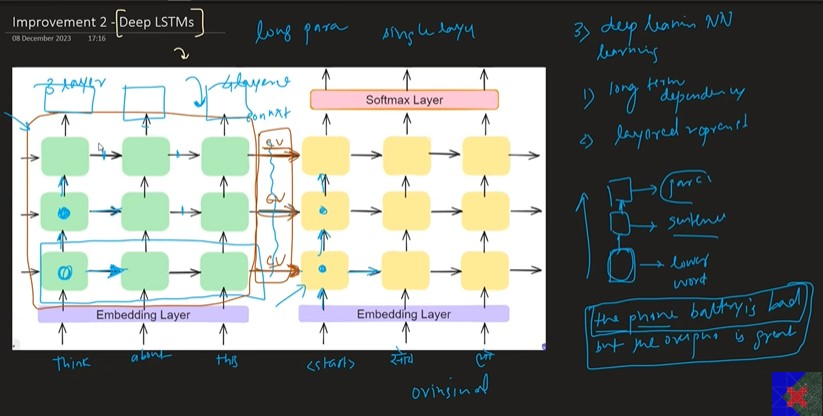

**3)Reverse the input while feeding it to encoder block - **

Previously , at every time step , we were giving input as "think" in 1st , "about" in 2nd and "it" in 3rd time step.

Now we will reverse this sequence to give "it" in 1st , "about" in 2nd and "think" in 3rd time step.

This trick will not work in every application or every dataset case. This will work in the data where more weightage of information lies in starting words of the data like english language.
By reversing the input sequence , we reduce the distance between english word and output corresponding hindi word which result in lesser efforts to reach at the word while backpropogation.

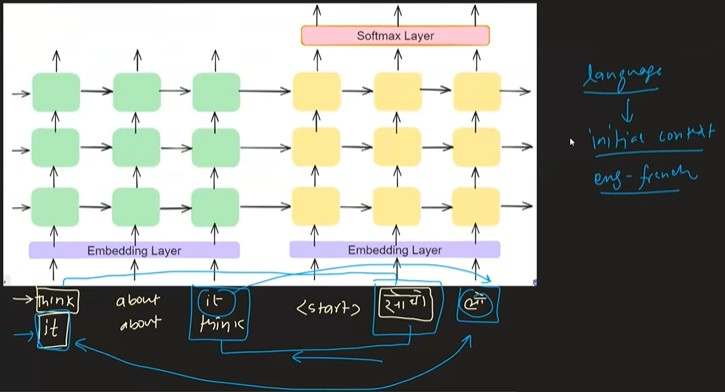
